In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from scipy import stats
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from acquire import get_telco_data
#from prepare import prep_titanic
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Aqcuiring data
df = get_telco_data()
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id,contract_type,internet_service_type_id,internet_service_type,payment_type_id,payment_type
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,2,59.9,542.4,No,1,Month-to-month,1,DSL,2,Mailed check
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,4,69.4,571.45,No,1,Month-to-month,1,DSL,4,Credit card (automatic)
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,1,48.2,340.35,No,1,Month-to-month,1,DSL,1,Electronic check
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,...,1,25.1,25.1,Yes,1,Month-to-month,1,DSL,1,Electronic check
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,Yes,...,3,30.5,30.5,Yes,1,Month-to-month,1,DSL,3,Bank transfer (automatic)


In [3]:
# We have 7043 rows andf 27 columns of data
df.shape

(7043, 27)

In [4]:
# We have no nulls. Data types, 1 float, 8 int, and 18 object.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [5]:
# Looking at a summary of statisics
df.describe()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,contract_type_id,internet_service_type_id,payment_type_id
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,1.872923,1.690473,2.315633,64.761692,1.690473,1.872923,2.315633
std,0.368612,24.559481,0.737796,0.833755,1.148907,30.090047,0.833755,0.737796,1.148907
min,0.000000,0.000000,1.000000,1.000000,1.000000,18.250000,1.000000,1.000000,1.000000
25%,0.000000,9.000000,1.000000,1.000000,1.000000,35.500000,1.000000,1.000000,1.000000
50%,0.000000,29.000000,2.000000,1.000000,2.000000,70.350000,1.000000,2.000000,2.000000
75%,0.000000,55.000000,2.000000,2.000000,3.000000,89.850000,2.000000,2.000000,3.000000
max,1.000000,72.000000,3.000000,3.000000,4.000000,118.750000,3.000000,3.000000,4.000000


In [6]:
# Seeing that max tenure is 72 months and min is 0
df.sort_values('tenure', ascending=False).head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id,contract_type,internet_service_type_id,internet_service_type,payment_type_id,payment_type
1923,2251-PYLPB,Male,0,Yes,No,72,Yes,Yes,1,Yes,...,4,79.55,5810.9,No,3,Two year,1,DSL,4,Credit card (automatic)
1919,2226-ICFDO,Female,0,Yes,Yes,72,Yes,Yes,1,Yes,...,4,85.90,6110.75,No,3,Two year,1,DSL,4,Credit card (automatic)
1921,2235-EZAIK,Female,0,Yes,No,72,Yes,Yes,1,Yes,...,4,79.20,5401.9,No,3,Two year,1,DSL,4,Credit card (automatic)
6446,0640-YJTPY,Male,0,Yes,Yes,72,Yes,No,3,No internet service,...,3,21.00,1493.75,No,3,Two year,3,None,3,Bank transfer (automatic)
1927,2274-XUATA,Male,1,Yes,No,72,No,No phone service,1,Yes,...,3,63.10,4685.55,No,3,Two year,1,DSL,3,Bank transfer (automatic)


In [7]:
# Dropping duplicates if they exist
df.drop_duplicates(inplace=True)
df.shape

(7043, 27)

In [8]:
# Switching gender column to read male. Keeping track of male and female
df.rename(columns={'gender': 'male'}, inplace=True)
# Making males have a value of 1 and females 0
df['male'] = df['male'].replace("Male", 1)
df['male'] = df['male'].replace("Female", 0)
df.male.value_counts()

1    3555
0    3488
Name: male, dtype: int64

In [9]:
# Switching partner column to read partners. 
df.rename(columns={'partner': 'partners'}, inplace=True)
# Partners have a value yes/no 1/0.
df['partners'] = df['partners'].replace("Yes", 1)
df['partners'] = df['partners'].replace("No", 0)
df.partners.value_counts()

0    3641
1    3402
Name: partners, dtype: int64

In [10]:
# Dependents column to read yes/no 1/0.
df['dependents'] = df['dependents'].replace("Yes", 1)
df['dependents'] = df['dependents'].replace("No", 0)
df.dependents.value_counts()

0    4933
1    2110
Name: dependents, dtype: int64

In [11]:
# phone_service column to read yes/no 1/0.
df['phone_service'] = df['phone_service'].replace("Yes", 1)
df['phone_service'] = df['phone_service'].replace("No", 0)
df.head()

,customer_id,male,senior_citizen,partners,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id,contract_type,internet_service_type_id,internet_service_type,payment_type_id,payment_type
0,0003-MKNFE,1,0,0,0,9,1,Yes,1,No,...,2,59.9,542.4,No,1,Month-to-month,1,DSL,2,Mailed check
1,0013-MHZWF,0,0,0,1,9,1,No,1,No,...,4,69.4,571.45,No,1,Month-to-month,1,DSL,4,Credit card (automatic)
2,0015-UOCOJ,0,1,0,0,7,1,No,1,Yes,...,1,48.2,340.35,No,1,Month-to-month,1,DSL,1,Electronic check
3,0023-HGHWL,1,1,0,0,1,0,No phone service,1,No,...,1,25.1,25.1,Yes,1,Month-to-month,1,DSL,1,Electronic check
4,0032-PGELS,0,0,1,1,1,0,No phone service,1,Yes,...,3,30.5,30.5,Yes,1,Month-to-month,1,DSL,3,Bank transfer (automatic)


In [12]:
# multiple_lines adding no phone service as no for multiple lines
df["multiple_lines"] = df["multiple_lines"].replace("No phone service", "No")
# Now making into yes/no 1/0
df.multiple_lines = df.multiple_lines.replace("Yes", 1)
df.multiple_lines = df.multiple_lines.replace("No", 0)
df.multiple_lines.value_counts()

0    4072
1    2971
Name: multiple_lines, dtype: int64

In [13]:
# Had to convert No internet service to No, then online_security into yes/no 1/0.
df["online_security"] = df["online_security"].replace("No internet service", "No")
df.online_security = df.online_security.replace("Yes", 1)
df.online_security = df.online_security.replace("No", 0)
df.online_security.value_counts()

0    5024
1    2019
Name: online_security, dtype: int64

In [14]:
# Looking into the min and max charges
print(df.monthly_charges.sort_values().head())
print(df.monthly_charges.sort_values().tail())

6291    18.25
7030    18.40
6455    18.55
6443    18.70
7037    18.70
Name: monthly_charges, dtype: float64
4993    118.35
5333    118.60
4870    118.60
5473    118.65
5407    118.75
Name: monthly_charges, dtype: float64


In [15]:
# Looking into the min and max total charges. Max value is 999.9. Keep that in mind
# There are 11 entries with no monthly charge. I need to see what to do with them
print(df.total_charges.sort_values().head(15))
print(df.total_charges.sort_values().tail())

2048          
6143          
1949          
1878          
6615          
6686          
6895          
6605          
6569          
2029          
2132          
761      100.2
3103    100.25
6574    100.35
963      100.4
Name: total_charges, dtype: object
6341    997.75
6261     998.1
3702    999.45
3392     999.8
4349     999.9
Name: total_charges, dtype: object


In [16]:
# Going to make $0 to retain them
df.total_charges = df.total_charges.where((df.tenure != 0), 0)
# Was getting error as the 0 values where inputed as strings. Changed them to floats
df['total_charges'] = df.total_charges.astype(float)
df.total_charges.min()
print(df.total_charges.sort_values().head(15))
print(df.total_charges.sort_values().tail(15))

2132     0.00
6615     0.00
6605     0.00
6569     0.00
6143     0.00
6686     0.00
6895     0.00
2048     0.00
2029     0.00
1949     0.00
1878     0.00
6145    18.80
6010    18.85
5989    18.85
6039    18.90
Name: total_charges, dtype: float64
5314    8443.70
5090    8456.75
5269    8468.20
5335    8476.50
5473    8477.60
5154    8477.70
5095    8496.70
5364    8529.50
5115    8543.25
5512    8547.15
5466    8564.75
5506    8594.40
5503    8670.10
5407    8672.45
4710    8684.80
Name: total_charges, dtype: float64


In [17]:
# Churn into yes/no 1/0
df.churn = df.churn.replace("Yes", 1)
df.churn = df.churn.replace("No", 0)
df.churn.value_counts()

0    5174
1    1869
Name: churn, dtype: int64

In [18]:
# Dropping cotract_type and renaming contract_type_id to cotract_type. 1 = Month-to-Month, 2 = 1 yr, 3 = 2 yr
df = df.drop("contract_type", axis=1)
df = df.rename(columns={'contract_type_id':'contract_type'})
df.head(1)

,customer_id,male,senior_citizen,partners,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type_id,internet_service_type,payment_type_id,payment_type
0,0003-MKNFE,1,0,0,0,9,1,1,1,0,...,No,2,59.9,542.4,0,1,1,DSL,2,Mailed check


In [19]:
# Looking at the value counts of the internet_service_types
df.internet_service_type.value_counts()

Fiber optic    3096
DSL            2421
None           1526
Name: internet_service_type, dtype: int64

In [20]:
# Dropping internet_service_type 
df = df.drop("internet_service_type", axis=1)

In [21]:
# Renaming internet_service_type_id to internet_service_type. ***************
# 1 = DSL, 2 = Fiber Optic yr, 3 = None ***************
df = df.rename(columns={'internet_service_type_id':'internet_service_type'})

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   male                   7043 non-null   int64  
 2   senior_citizen         7043 non-null   int64  
 3   partners               7043 non-null   int64  
 4   dependents             7043 non-null   int64  
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   int64  
 7   multiple_lines         7043 non-null   int64  
 8   internet_service_type  7043 non-null   int64  
 9   online_security        7043 non-null   int64  
 10  online_backup          7043 non-null   object 
 11  device_protection      7043 non-null   object 
 12  tech_support           7043 non-null   object 
 13  streaming_tv           7043 non-null   object 
 14  streaming_movies       7043 non-null   object 
 15  cont

In [23]:
# Going to add other_services column. It will contain online_security = 1, online_backup = 2, 
# device_protection = 3, tech_support = 4, streaming_tv = 5, streaming_movies = 6
#other_services = pd.DataFrame({"col1": ["online_security", "online_backup", "device_protection", "tech_support", "streaming_tv", "streaming_movies"], "other_services": [1,2,3,4,5,6]})
#other_services

In [24]:
# Concatinating both dataframes
#df = pd.concat([df, other_services], axis=1)
#df.head()

In [25]:
# Dropping online_security, online_backup, device_protection, tech_support, streaming_tv, streaming_movies, col1
#df = df.drop(["online_security", "online_backup", "device_protection", "tech_support", "streaming_tv", "streaming_movies", "col1"], axis=1)
#df.head()

In [26]:
# paperless_billing into yes/no 1/0
df.paperless_billing = df.paperless_billing.replace("Yes", 1)
df.paperless_billing = df.paperless_billing.replace("No", 0)
df.head(1)

,customer_id,male,senior_citizen,partners,dependents,tenure,phone_service,multiple_lines,internet_service_type,online_security,...,contract_type,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type_id,payment_type
0,0003-MKNFE,1,0,0,0,9,1,1,1,0,...,1,0,2,59.9,542.4,0,1,1,2,Mailed check


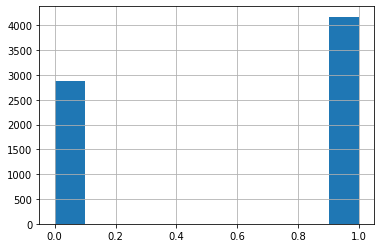

In [34]:
df["paperless_billing"].hist()

In [35]:
df.head(1)

,customer_id,male,senior_citizen,partners,dependents,tenure,phone_service,multiple_lines,internet_service_type,online_security,...,contract_type,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type_id,payment_type
0,0003-MKNFE,1,0,0,0,9,1,1,1,0,...,1,0,2,59.9,542.4,0,1,1,2,Mailed check


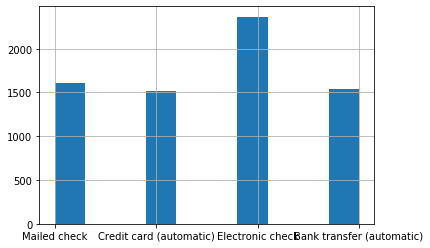

In [36]:
df["payment_type"].hist()

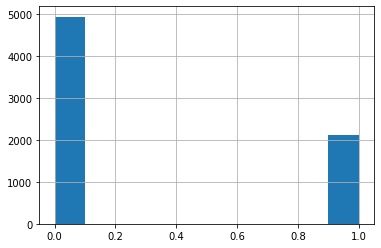

In [37]:
df["dependents"].hist()

In [38]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   telco_data_cleaning.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [39]:
!git add -A 

In [31]:
!git commit -m "Adding my prepare file and edited data cleaning file"

In [32]:
#!git push